## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the datasets

In [2]:
## train
train = pd.read_csv("C:/Users/wwaswa/Desktop/ALX DS/Fraud Detection Challenge/Train.csv")

In [3]:
##test
test = pd.read_csv("C:/Users/wwaswa/Desktop/ALX DS/Fraud Detection Challenge/Test.csv")

In [4]:
##sample submission
sample_submission = pd.read_csv("C:/Users/wwaswa/Desktop/ALX DS/Fraud Detection Challenge/SampleSubmission.csv")

In [5]:
##variable description
variable_description = pd.read_csv("C:/Users/wwaswa/Desktop/ALX DS/Fraud Detection Challenge/VariableDescription.csv")

## Exploratory Data Analysis

In [6]:
train.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,44,6210,C,99,0,3707,4,2,2,2,...,16.639203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id17437
1,401,14383,M,22,0,6105,4,2,2,2,...,17.827703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id5086
2,243,11555,M,23,0,5751,4,2,2,2,...,15.473503,25387000.0,0.0,0.0,4571280.0,NaN,NaN,NaN,NaN,train_id1443
3,72,6175,C,99,0,4402,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id15469
4,42,1417,M,23,0,6302,4,2,2,2,...,14.286244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id14368


In [7]:
test.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,RES_ANNIMP,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,238,5016,M,22,0,3601,4,2,2,2,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1120
1,173,3757,M,22,0,3912,4,2,2,2,...,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1680
2,125,15482,C,99,0,4221,4,2,2,1,...,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id1063
3,9,11722,C,99,0,3203,4,2,2,2,...,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id3731
4,153,6557,P,99,0,6308,4,2,2,2,...,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test_id9766


In [8]:
sample_submission.head()

,id,target
0,test_id1120,8
1,test_id1680,5
2,test_id1063,10
3,test_id3731,10
4,test_id9766,10


In [9]:
variable_description.head()

,Libellé,Intitulé,Title
0,Contribuable,NaN,Rate payer
1,BCT_CODBUR,Code Bureau de contrôle des impôts,Code Tax Control Office
2,CTR_MATFIS,ID Contribuable,Rate payer ID
3,CTR_CATEGO_x,Catégorie Contribuable,Rate payer category
4,CTR_CODTVA,Code TVA,Code TVA


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Columns: 121 entries, BCT_CODBUR to id
dtypes: float64(103), int64(16), object(2)
memory usage: 19.7+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7517 entries, 0 to 7516
Columns: 120 entries, BCT_CODBUR to id
dtypes: float64(102), int64(16), object(2)
memory usage: 6.9+ MB


In [12]:
train.columns

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       ...
       'target', 'FAC_MNTPRI_F', 'FAC_MFODEC_F', 'FAC_MNTDCO_F',
       'FAC_MNTTVA_F', 'FAC_MNTPRI_C', 'FAC_MFODEC_C', 'FAC_MNTDCO_C',
       'FAC_MNTTVA_C', 'id'],
      dtype='object', length=121)

In [13]:
test.columns

Index(['BCT_CODBUR', 'CTR_MATFIS', 'CTR_CATEGO_X', 'FJU_CODFJU', 'CTR_CESSAT',
       'ACT_CODACT', 'CTR_OBLDIR', 'CTR_OBLACP', 'CTR_OBLRES', 'CTR_OBLFOP',
       ...
       'RES_ANNIMP', 'FAC_MNTPRI_F', 'FAC_MFODEC_F', 'FAC_MNTDCO_F',
       'FAC_MNTTVA_F', 'FAC_MNTPRI_C', 'FAC_MFODEC_C', 'FAC_MNTDCO_C',
       'FAC_MNTTVA_C', 'id'],
      dtype='object', length=120)

In [14]:
train.shape

(21295, 121)

In [15]:
test.shape

(7517, 120)

In [16]:
##checking for missing values in the datasets


In [17]:
train.isnull().sum()

BCT_CODBUR          0
CTR_MATFIS          0
CTR_CATEGO_X        0
FJU_CODFJU          0
CTR_CESSAT          0
                ...  
FAC_MNTPRI_C    19182
FAC_MFODEC_C    19182
FAC_MNTDCO_C    19182
FAC_MNTTVA_C    19182
id                  0
Length: 121, dtype: int64

In [18]:
test.isnull().sum()

BCT_CODBUR         0
CTR_MATFIS         0
CTR_CATEGO_X       0
FJU_CODFJU         0
CTR_CESSAT         0
                ... 
FAC_MNTPRI_C    6765
FAC_MFODEC_C    6765
FAC_MNTDCO_C    6765
FAC_MNTTVA_C    6765
id                 0
Length: 120, dtype: int64

## Visualing the dataset

<Axes: >

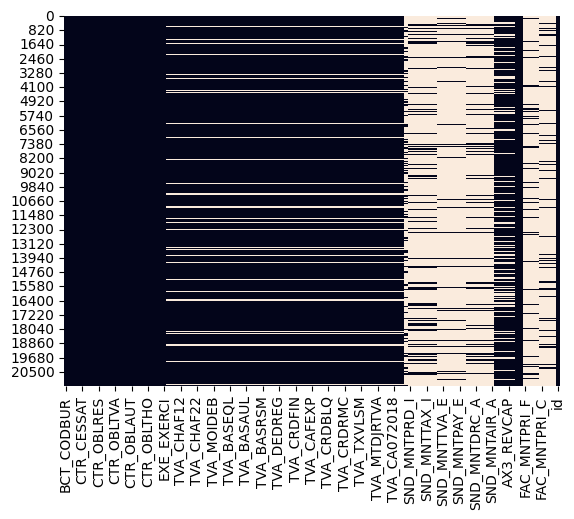

In [19]:
sns.heatmap(train.isnull(), cbar = False)

In [20]:
## % of missing values

In [21]:
missing_values = train.isnull().sum().sum()

In [22]:
missing_values

686653

In [23]:
 missing_percent = train.isnull().sum()/ train.shape[0]*100
print(missing_percent)

BCT_CODBUR       0.000000
CTR_MATFIS       0.000000
CTR_CATEGO_X     0.000000
FJU_CODFJU       0.000000
CTR_CESSAT       0.000000
                  ...    
FAC_MNTPRI_C    90.077483
FAC_MFODEC_C    90.077483
FAC_MNTDCO_C    90.077483
FAC_MNTTVA_C    90.077483
id               0.000000
Length: 121, dtype: float64
